In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from scipy.stats import norm
import scipy.stats as stats
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.core.display import HTML, display

/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#function to convert time in to time delta from string
def convert_time(s):
    h,m,s = map(int,s.split(':'))
    return pd.Timedelta(hours =h,minutes = m, seconds =s)

In [3]:
h2016 = pd.read_csv('data/2016_half_results.csv',converters={'Time':convert_time})
h2017 = pd.read_csv('data/2017_half_results.csv',converters={'Time':convert_time})
h2018 = pd.read_csv('data/2018_half_results.csv',converters={'Time':convert_time})
h2019 = pd.read_csv('data/2019_half_results.csv',converters={'Time':convert_time})

In [31]:
# count of unfinished runners in 2016
h2016[(h2016['Overall']==99999)].count()

Unnamed: 0    4512
Overall       4512
Bib           4512
Name          4512
Time          4512
Year          4512
Distance      4512
dtype: int64

In [9]:
h2017[(h2017['Overall']==99999)].count()

Unnamed: 0    4593
Overall       4593
Bib           4593
Name          4593
Time          4593
Year          4593
Distance      4593
dtype: int64

In [10]:
#similar to full marathon 99999 has been cleared from the results
h2018[(h2018['Overall']==99999)].count()

Unnamed: 0    0
Overall       0
Bib           0
Name          0
Time          0
Year          0
Distance      0
dtype: int64

In [11]:
h2019[(h2019['Overall']==99999)].count()

Unnamed: 0    3530
Overall       3530
Bib           3530
Name          3530
Time          3530
Year          3530
Distance      3530
dtype: int64

In [17]:
h2019.shape

(17236, 7)

In [14]:
#percentage of runners who did not finish 2016
4512/22429*100

20.116813054527622

In [16]:
#percentage of runners who did not finish 2017
4593/22292*100

20.603804055266465

In [18]:
#percentage of runners who did not finish 2019
3530/17236*100

20.48038988164307

In [5]:
#drop unfinished runners
h2016 = h2016[:-4512]
h2017 = h2017[:-4593]
h2019 = h2019[:-3530]

In [6]:
#convert to seconds, timedelta64[ns]
h2016['seconds']=h2016['Time'].astype('timedelta64[s]')
h2017['seconds']=h2017['Time'].astype('timedelta64[s]')
h2018['seconds']=h2018['Time'].astype('timedelta64[s]')
h2019['seconds']=h2019['Time'].astype('timedelta64[s]')

In [7]:
#convert to minutes
h2016['minutes']=h2016['seconds']/60
h2017['minutes']=h2017['seconds']/60
h2018['minutes']=h2018['seconds']/60
h2019['minutes']=h2019['seconds']/60

In [8]:
#convert to hours
h2016['hours']=h2016['minutes']/60
h2017['hours']=h2017['minutes']/60
h2018['hours']=h2018['minutes']/60
h2019['hours']=h2019['minutes']/60

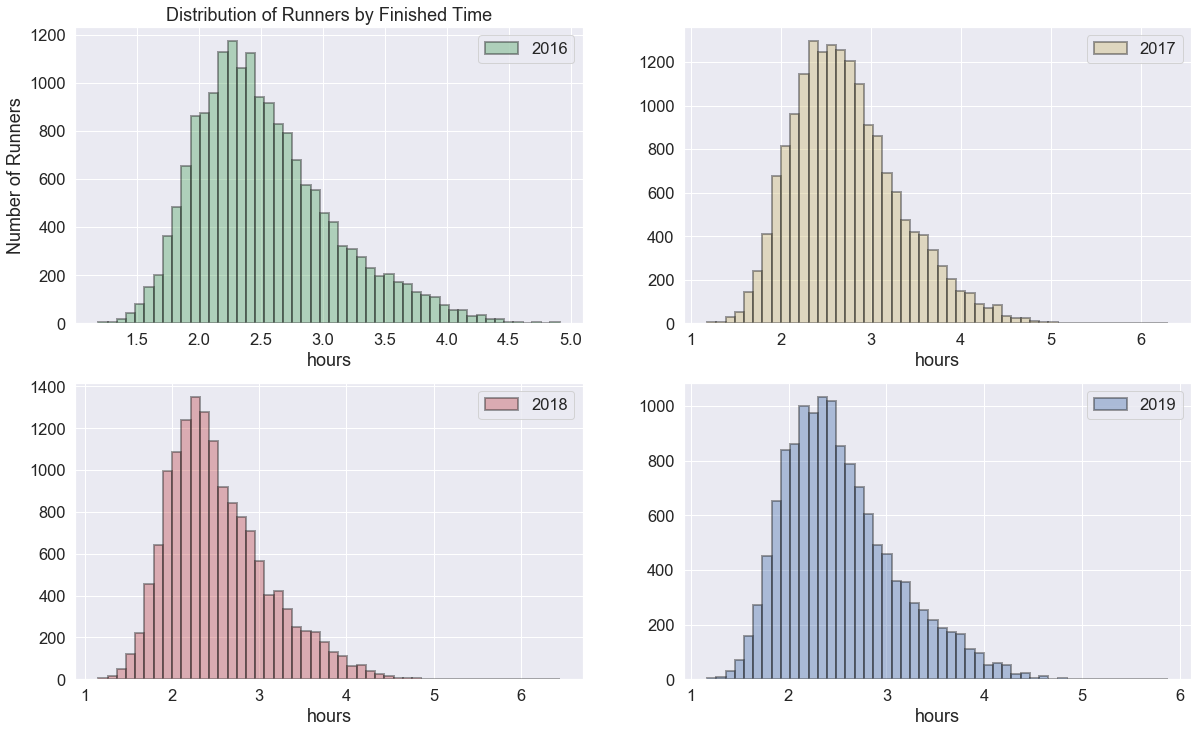

In [40]:
#trying different visuals for time distribution
fig = plt.figure(figsize=(20,12))
sns.set(font_scale=1.5)

plt.subplot(2,2,1)
sns.distplot(h2016['hours'],kde = False,color='g',label='2016',
             hist_kws=dict(edgecolor="k", linewidth=2))
plt.title('Distribution of Runners by Finished Time')
plt.ylabel('Number of Runners')
plt.legend()

plt.subplot(2,2,2)
sns.distplot(h2017['hours'],kde = False,color='y',label='2017',
             hist_kws=dict(edgecolor="k", linewidth=2))
plt.legend()

plt.subplot(2,2,3)
sns.distplot(h2018['hours'],kde = False,color='r',label='2018',
             hist_kws=dict(edgecolor="k", linewidth=2))
plt.legend()

plt.subplot(2,2,4)
sns.distplot(h2019['hours'],kde = False,color='b',label='2019',
             hist_kws=dict(edgecolor="k", linewidth=2));
plt.legend();

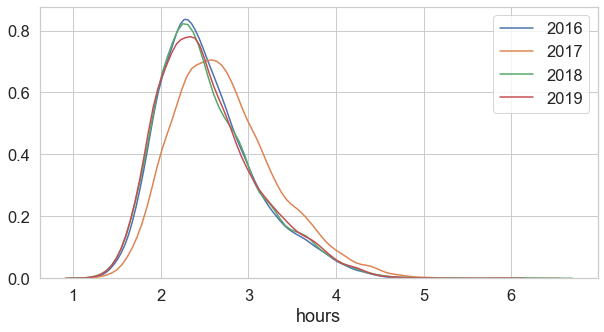

In [42]:
fig = plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.distplot(h2016['hours'],label='2016',hist=False)
sns.distplot(h2017['hours'],label='2017',hist=False)
sns.distplot(h2018['hours'],label='2018',hist=False)           
sns.distplot(h2019['hours'],label='2019',hist=False);
        

In [44]:
Years=[2016,2017,2019]
Finished=[2952,2466,2024]
Total = [3842,3651,2810]
Not_finished=[890,1175,786]

complete_runners = pd.DataFrame()

complete_runners['Year'] = Years
complete_runners['Finished']=Finished
complete_runners['Not_Finished']=Not_finished

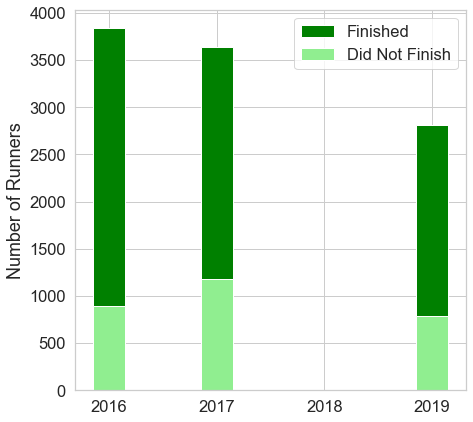

In [45]:
#stacked bar chart of finishers ..
fig = plt.figure(figsize=(7,7))
plt.bar(complete_runners.Year,complete_runners.Finished,width=0.3,color='green',label = 'Finished',bottom=complete_runners.Not_Finished)
plt.bar(complete_runners.Year,complete_runners.Not_Finished, width=0.3,color='lightgreen',label = "Did Not Finish")
plt.legend(loc='best')
plt.ylabel('Number of Runners');


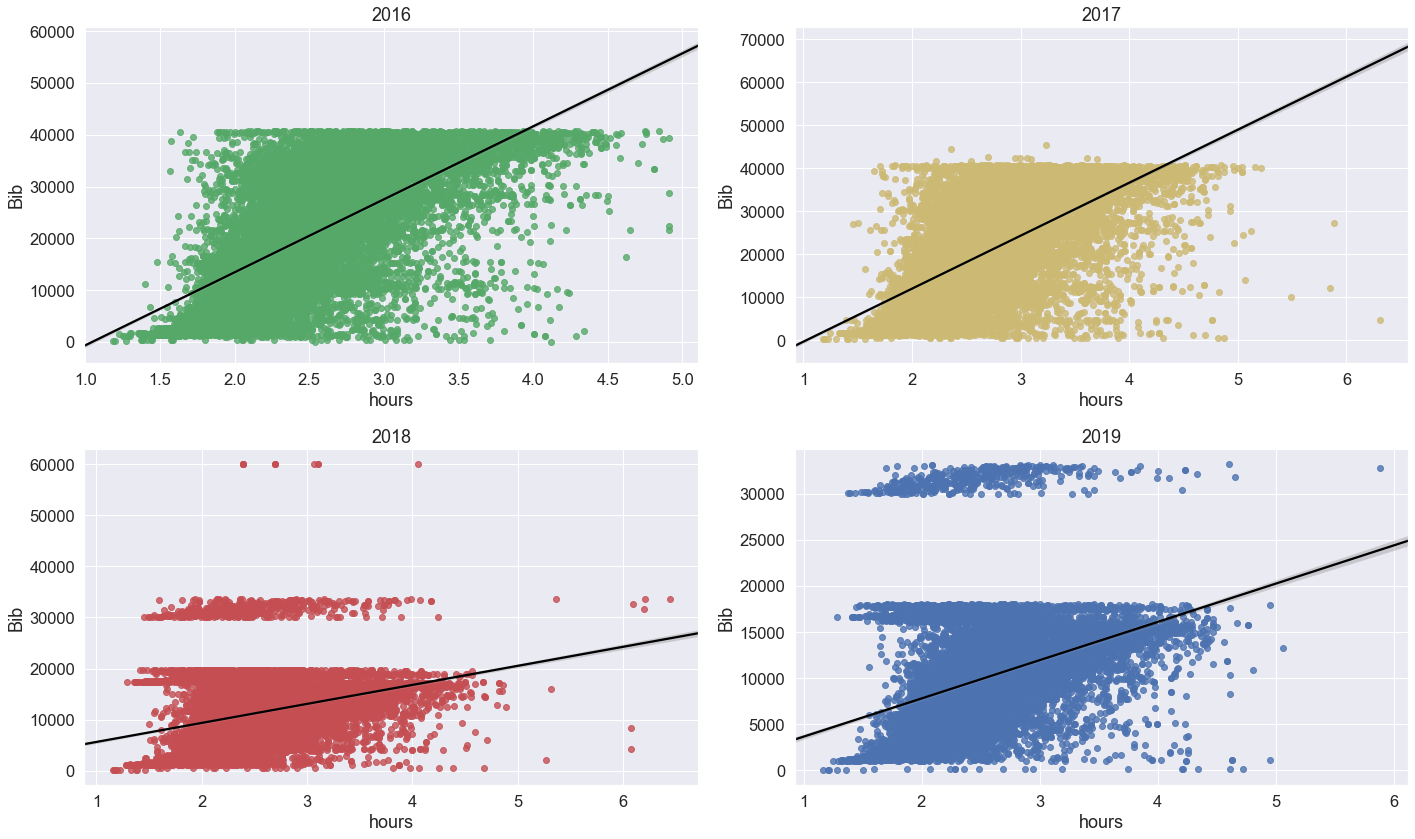

In [46]:
#is there a correlation between bib number and finished time?

fig = plt.figure(figsize=(20,12))
sns.set(font_scale=1.5)

plt.subplot(2,2,1)
sns.regplot(h2016['hours'],h2016['Bib'],color='g',line_kws={'color':'black'},label='2016')
plt.title('2016')

plt.subplot(2,2,2)
sns.regplot(h2017['hours'],h2017['Bib'],color='y',line_kws={'color':'black'},label='2017')
plt.title('2017')

plt.subplot(2,2,3)
sns.regplot(h2018['hours'],h2018['Bib'],color='r',line_kws = {'color':'black'},label='2018')
plt.title('2018')

plt.subplot(2,2,4)
sns.regplot(h2019['hours'],h2019['Bib'],color='b',line_kws={'color':'black'},label='2019')
plt.title('2019')
plt.tight_layout();

<Figure size 1440x864 with 0 Axes>

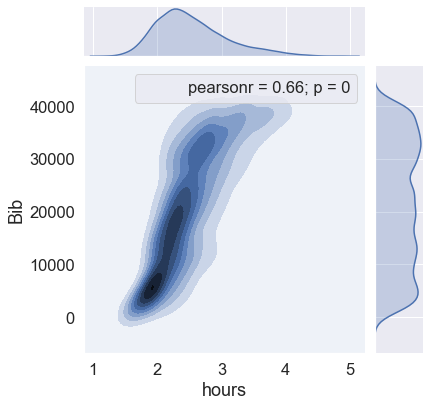

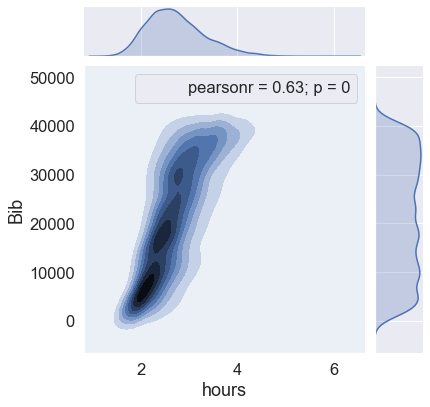

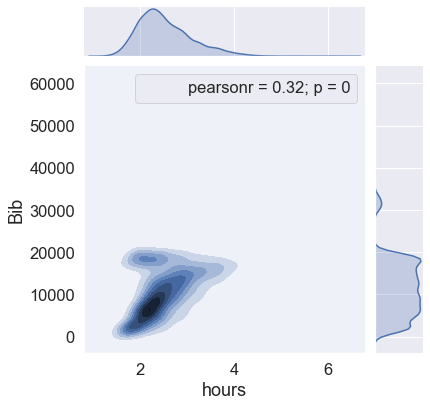

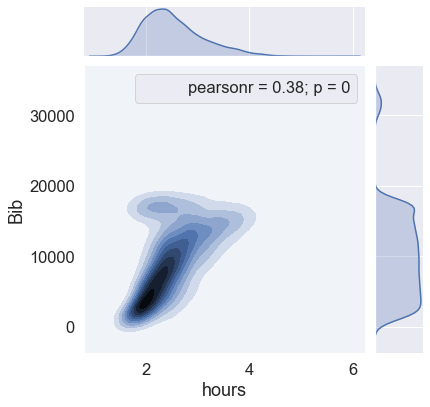

In [50]:
fig = plt.figure(figsize=(20,12))
sns.set(font_scale=1.5)

#plt.subplot(2,1,1)
j=sns.jointplot(x="hours", y="Bib", data=h2016, kind='kde',
                  joint_kws={'color':'green'})
j.annotate(stats.pearsonr)

#plt.subplot(2,1,2)
k=sns.jointplot(x="hours", y="Bib", data=h2017, kind='kde',
                  joint_kws={'color':'y'})
k.annotate(stats.pearsonr)

#plt.subplot(2,2,3)
k=sns.jointplot(x="hours", y="Bib", data=h2018, kind='kde',
                  joint_kws={'color':'r'})
k.annotate(stats.pearsonr)

#plt.subplot(2,2,4)
k=sns.jointplot(x="hours", y="Bib", data=h2019, kind='kde',
                  joint_kws={'color':'b'})
k.annotate(stats.pearsonr);



In [ ]:
#Bib distribution may have some sort of method based partially on time. ..i.e.age,gender...

In [49]:
h2018[(h2018['Bib']>50000)]
#unknown names? malfunction of bib tag..tracking chip.

,Unnamed: 0,Overall,Bib,Name,Time,Year,Distance,seconds,minutes,hours
7103,7103,7103,60025,Contact Sportstats,02:23:44,2018,Half,8624.0,143.733333,2.395556
7110,7110,7109,60026,Contact Sportstats,02:23:45,2018,Half,8625.0,143.750000,2.395833
7116,7116,7117,60024,Contact Sportstats,02:23:46,2018,Half,8626.0,143.766667,2.396111
7117,7117,7117,60029,Contact Sportstats,02:23:46,2018,Half,8626.0,143.766667,2.396111
9962,9962,9962,60032,Contact Sportstats,02:41:29,2018,Half,9689.0,161.483333,2.691389
9963,9963,9962,60030,Contact Sportstats,02:41:29,2018,Half,9689.0,161.483333,2.691389
9990,9990,9991,60037,Contact Sportstats,02:41:39,2018,Half,9699.0,161.650000,2.694167
12445,12445,12445,60038,Contact Sportstats,03:04:06,2018,Half,11046.0,184.100000,3.068333
12578,12578,12578,60034,Contact Sportstats,03:06:00,2018,Half,11160.0,186.000000,3.100000
12582,12582,12581,60033,Contact Sportstats,03:06:02,2018,Half,11162.0,186.033333,3.100556
